# Predicting COVID-19 from Chest X-Ray Images

### STEP 1: IMPORTING LIBRARIES

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


### STEP 2: CLONING DATASET

In [2]:
#save final weights to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [4]:
#zip_file_name = "/content/drive/MyDrive/" #@param {type:"string"}
#!unrar {zip_file_name}.rar
!unrar x "/content/drive/MyDrive/covid/DataSet.rar" "/content/drive/MyDrive/covid/"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/covid/DataSet.rar

Creating    /content/drive/MyDrive/covid/DataSet                      OK
Creating    /content/drive/MyDrive/covid/DataSet/Data                 OK
Creating    /content/drive/MyDrive/covid/DataSet/Data/test            OK
Creating    /content/drive/MyDrive/covid/DataSet/Data/test/COVID19    OK
Extracting  /content/drive/MyDrive/covid/DataSet/Data/test/COVID19/COVID-19 (313).jpg       0%  OK 
Extracting  /content/drive/MyDrive/covid/DataSet/Data/test/COVID19/COVID-19 (353).jpg       0%  OK 
Extracting  /content/drive/MyDrive/covid/DataSet/Data/test/COVID19/COVID-19 (371).jpg       0%  OK 
Extracting  /content/drive/MyDrive/covid/DataSet/Data/test/COVID19/COVID-19 (425).jpg       0%  OK 
Extracting  /content/drive/MyDrive/covid/DataSet/Data/test/COVID19/COVID-19 (439).jpg       0%  OK 
Extracting  /content/drive/My

In [5]:
image_path = '/content/drive/MyDrive/covid/DataSet/Data'

In [8]:
print(image_path)
labels = []
for i in os.listdir(image_path):
  if os.path.isdir(os.path.join(image_path, i)):
    labels.append(i)
print(labels)

/content/drive/MyDrive/covid/DataSet/Data
['test', 'train']


In [9]:

image_path = '/content/drive/MyDrive/covid/DataSet/Data'

# SETTING TRAIN AND TEST DIRECTORY
train_dir = os.path.join(image_path, "train")
test_dir = os.path.join(image_path, "test")

#SETING DIRECTORY FOR COVID AND NORMAL IMAGES DIRECTORY
train_covid_dir = os.path.join(train_dir, "COVID19")
train_normal_dir = os.path.join(train_dir, "NORMAL")

test_covid_dir = os.path.join(test_dir, "COVID19")
test_normal_dir = os.path.join(test_dir, "NORMAL")


In [10]:
# MAKING SEPERATE FILES :
train_covid_names = os.listdir(train_covid_dir)
train_normal_names = os.listdir(train_normal_dir)

test_covid_names = os.listdir(test_covid_dir)
test_normal_names = os.listdir(test_normal_dir)

### STEP 3: PERFORMING DATA VISUALIZATION

['/content/drive/MyDrive/covid/DataSet/Data/train/COVID19/COVID-19 (1).jpeg', '/content/drive/MyDrive/covid/DataSet/Data/train/COVID19/COVID-19 (1).png', '/content/drive/MyDrive/covid/DataSet/Data/train/COVID19/COVID-19 (10).jpeg', '/content/drive/MyDrive/covid/DataSet/Data/train/COVID19/COVID-19 (101).jpg', '/content/drive/MyDrive/covid/DataSet/Data/train/COVID19/COVID-19 (107).jpg', '/content/drive/MyDrive/covid/DataSet/Data/train/COVID19/COVID-19 (11).jpeg', '/content/drive/MyDrive/covid/DataSet/Data/train/COVID19/COVID-19 (11).jpg', '/content/drive/MyDrive/covid/DataSet/Data/train/COVID19/COVID-19 (12).jpeg']
['/content/drive/MyDrive/covid/DataSet/Data/train/NORMAL/NORMAL(0).jpg', '/content/drive/MyDrive/covid/DataSet/Data/train/NORMAL/NORMAL(1).jpg', '/content/drive/MyDrive/covid/DataSet/Data/train/NORMAL/NORMAL(100).jpg', '/content/drive/MyDrive/covid/DataSet/Data/train/NORMAL/NORMAL(1000).jpg', '/content/drive/MyDrive/covid/DataSet/Data/train/NORMAL/NORMAL(1002).jpg', '/content/

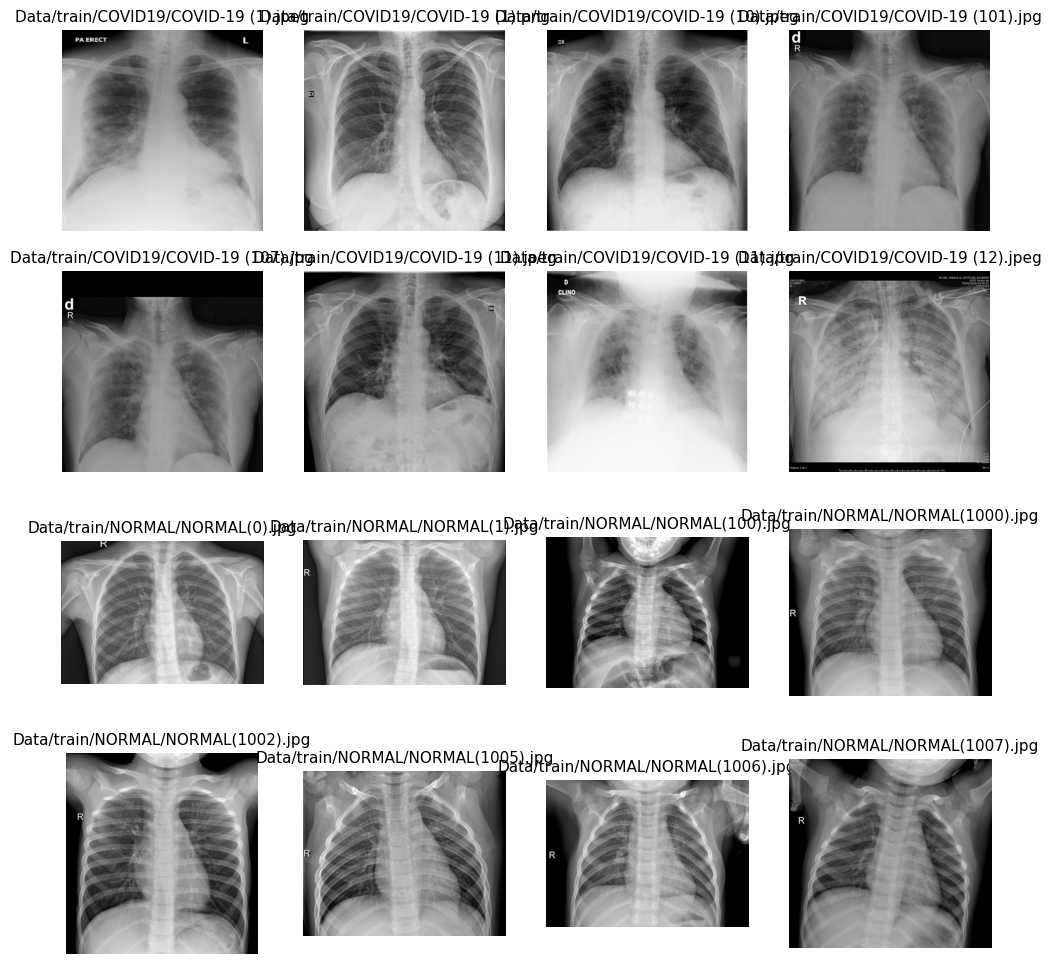

In [11]:
import matplotlib.image as mpimg

rows = 4
columns = 4

fig = plt.gcf()
fig.set_size_inches(12,12)

covid_img = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_img = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]

print(covid_img)
print(normal_img)

merged_img = covid_img + normal_img

for i, img_path in enumerate(merged_img):
  title = img_path.split("/", 6)[6]
  plot = plt.subplot(rows, columns, i+1)
  plot.axis("Off")
  img = mpimg.imread(img_path)
  plot.set_title(title, fontsize = 11)
  plt.imshow(img, cmap= "gray")

plt.show()

# 4) DATA PREPROCESSING AND AUGMENTATION

In [12]:
# CREATING TRAINING, TESTING AND VALIDATION BATCHES

dgen_train = ImageDataGenerator(rescale = 1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)

dgen_validation = ImageDataGenerator(rescale = 1./255,
                                     )

dgen_test = ImageDataGenerator(rescale = 1./255,
                              )

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')
validation_generator = dgen_train.flow_from_directory(train_dir,
                                                      target_size = (150, 150),
                                                      subset = "validation",
                                                      batch_size = 32,
                                                      class_mode = "binary")
test_generator = dgen_test.flow_from_directory(test_dir,
                                               target_size = (150, 150),
                                               batch_size = 32,
                                               class_mode = "binary")




Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [13]:
print("Class Labels are: ", train_generator.class_indices)
print("Image shape is : ", train_generator.image_shape)

Class Labels are:  {'COVID19': 0, 'NORMAL': 1}
Image shape is :  (150, 150, 3)


### STEP 5: BUILDING CONVOLUTIONAL NEURAL NETWORK MODEL

In [14]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

# 1) CONVOLUTIONAL LAYER - 1
model.add(Conv2D(32, (5,5), padding = "same", activation = "relu", input_shape = train_generator.image_shape))

# 2) POOLING LAYER - 1
model.add(MaxPooling2D(pool_size=(2,2)))

# 3) DROPOUT LAYER -2
model.add(Dropout(0.5))

# 4) CONVOLUTIONAL LAYER - 2
model.add(Conv2D(64, (5,5), padding = "same", activation = "relu"))

# 5) POOLING LAYER - 2
model.add(MaxPooling2D(pool_size=(2,2)))

# 6) DROPOUT LAYER - 2
model.add(Dropout(0.5))

# 7) FLATTENING LAYER TO 2D SHAPE
model.add(Flatten())

# 8) ADDING A DENSE LAYER
model.add(Dense(256, activation = 'relu'))

# 9 DROPOUT LAYER - 3
model.add(Dropout(0.5))

# 10) FINAL OUTPUT LAYER
model.add(Dense(1, activation = 'sigmoid'))

### PRINTING MODEL SUMMARY
model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,429,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,483,905 (85.77 MB)

 Trainable params: 22,483,905 (85.77 MB)

 Non-trainable params: 0 (0.00 B)

### STEP 6: COMPILING AND TRAINING THE NEURAL NETWORK MODEL

In [15]:
# COMPILING THE MODEL

model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
# TRAINING THE MODEL
history = model.fit(train_generator,
                    epochs = 20,
                    validation_data = validation_generator)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6492 - loss: 1.7066 - val_accuracy: 0.8619 - val_loss: 0.4350
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.9003 - loss: 0.2744 - val_accuracy: 0.9503 - val_loss: 0.2482
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9368 - loss: 0.1839 - val_accuracy: 0.9475 - val_loss: 0.1502
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.9288 - loss: 0.1790 - val_accuracy: 0.9530 - val_loss: 0.2093
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9580 - loss: 0.1535 - val_accuracy: 0.9613 - val_loss: 0.1225
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9463 - loss: 0.1748 - val_accuracy: 0.9641 - val_loss: 0.1190
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9690 - loss: 0.1187 - val_accuracy: 0.9669 - val_loss: 0.0956
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.9714 - loss: 0.1005 - val_accuracy: 0.9669 - val_loss:

# 7) PERFORMING EVALUATION


In [17]:
# KEYS OF HISTORY OBJECT
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

Text(0.5, 0, 'epoch')

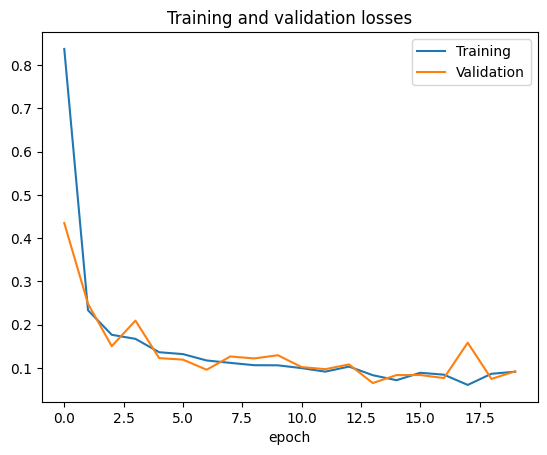

In [18]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION LOSS
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation losses")
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

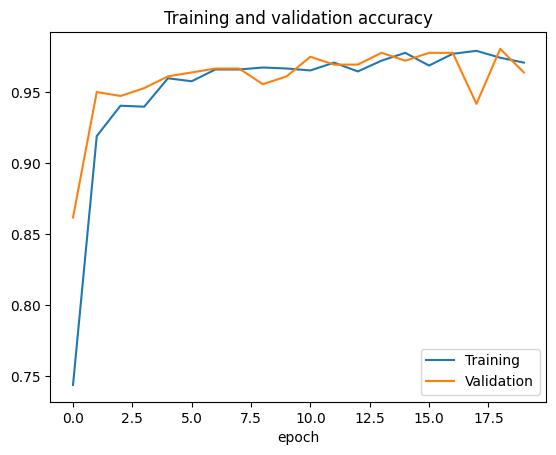

In [19]:
# PLOT GRAPH BETWEEN TRAINING AND VALIDATION ACCURACY
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title("Training and validation accuracy")
plt.xlabel('epoch')

In [20]:
# GETTING TEST ACCURACY AND LOSS

test_loss, test_acc = model.evaluate(test_generator)
print("Test Set Loss : ", test_loss)
print("Test Set Accuracy : ", test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 820ms/step - accuracy: 0.9490 - loss: 0.1341
Test Set Loss :  0.1352929174900055
Test Set Accuracy :  0.9504132270812988


### STEP 7: PREDICTION ON NEW DATA (UPLOAD FILES)

In [21]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for filename in uploaded.keys():
  img_path = '/content/' + filename
  img = image.load_img(img_path, target_size = (150,150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis = 0)
  prediction = model.predict(images)

  if prediction == 0:
    print("The report is COVID-19 Positive")
  else:
    print("The report is COVID-19 Negative")

Saving COVID-19 (461).jpg to COVID-19 (461).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step
The report is COVID-19 Positive


In [22]:
model.save("model.h5")